In [1]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import networkx as nx
import scipy.stats as sps

from scipy.spatial import Delaunay
from networkx.algorithms.tree.mst import minimum_spanning_tree

In [51]:
def emst(points, M, r=0, show_delaunay=False, show_mst=False):
  G = nx.Graph()
  for i in range(len(points)):
      G.add_node(i, pos = points[i])

  ways = calc_ways(G, r)
  print(ways)
  try:
    tri = Delaunay(points)
    for triangle in tri.simplices:
      for i in range(3):
        cnt = ways[triangle[i]][triangle[(i+1)%3]]
        cnt = min(cnt, M)
        norm = np.linalg.norm(points[triangle[i]] - points[triangle[(i+1)%3]])

        G.add_edge(triangle[i], triangle[(i+1)%3], weight = cnt * norm)
  except:
    print("problems with Delaunay")
    for i in range(len(points)):
      for j in range(i + 1, len(points)):
        cnt = ways[i][j]
        cnt = min(cnt, M)
        norm = np.linalg.norm(points[i]-points[j])
    
        G.add_edge(i, j, weight = cnt * norm)
  finally:
    pos=nx.get_node_attributes(G,'pos')
    if(show_delaunay):
      nx.draw(G, pos, with_labels = True)
      plt.show()
    G_mst = minimum_spanning_tree(G, algorithm='kruskal')
    if(show_mst):
      nx.draw(G_mst, pos, with_labels=True)
      plt.show()
  return G_mst  

In [4]:
def complete_graph(points, show=True):
  G = nx.Graph()
  for i in range(len(points)):
    G.add_node(i, pos = points[i])
  for i in range(len(points)):
    for j in range(i + 1, len(points)):
      G.add_edge(i, j, weight = np.linalg.norm(points[i]-points[j]))
  pos = nx.get_node_attributes(G,'pos')
  if(show):
    nx.draw(G, pos, with_labels = True)
    plt.show()
  return G

In [29]:
def calc_ways(G, r=0):
  points = list(G.nodes)
  G_c = complete_graph(points, False)
  edges = np.zeros((len(points), len(points)))
  for v in points:
    path = nx.bellman_ford_path(G_c, r, v)
    prev = path[0]
    for i in range(1, len(path)):
      edges[prev][path[i]] += 1
      edges[path[i]][prev] += 1
      prev = path[i]
  return edges

In [6]:
def get_weight(G):
  sum = 0
  for i in G.edges.data('weight'):
    sum += i[2]
  print(f'Weight = {sum}')
  return sum

In [7]:
def draw_points(points):
  G = nx.Graph()
  for i in range(len(points)):
    G.add_node(i, pos = points[i])
  pos=nx.get_node_attributes(G,'pos')
  nx.draw(G, pos, with_labels = True)
  plt.show()

# **Example**

graph


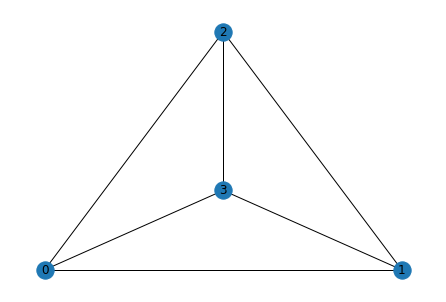

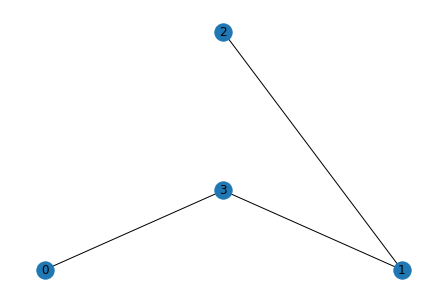

Weight = 0.5773502691896257

V_0


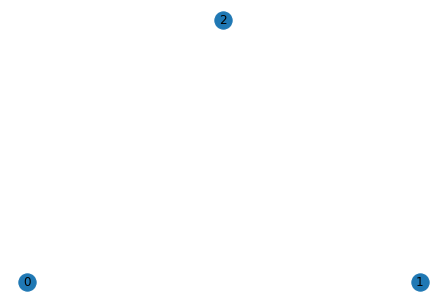

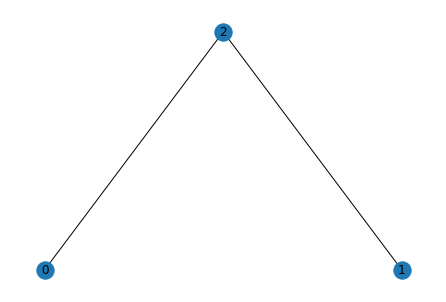

Weight = 0.9999999999999999
emst



In [48]:
points_V = np.array([[0, 0], [1, 0], [1/2,np.sqrt(3)/2], [1/2,np.sqrt(3)/6]])
print("graph")
weight_v = get_weight(emst(points_V, M=2, r=0, show_delaunay=True, show_mst=True))


print("\nV_0")
points_V_0 = np.array([[0, 0], [1, 0], [1/2,np.sqrt(3)/2]])
draw_points(points_V_0)
weight_v_0 = get_weight(emst(points_V_0, M=2, r=0, show_delaunay=False, show_mst=True))
print("emst\n")
